# Exploration 3

## 카메라 스티커앱 만들기 첫걸음

## 3. 옆으로 누워서 촬영하면 왜 안될까요?

   - 옆으로 누운 경우는 Landmark가 식별되지 않아 프로그램 상에서 변수가 활성화 되지 않아 (??) 에러가 발생됨.
   - 위에서 landmark를 못잡았다고 하였지만 얼굴 박스도 잡지 못하였다. 
   - 원인은 아직 이런 부분까지는 적용되지 않는 라이브러리를 사용한 것 같다.
   - 테스트 파일 : exp_03_93.ipynb


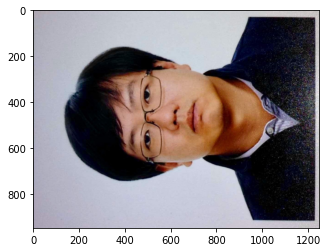

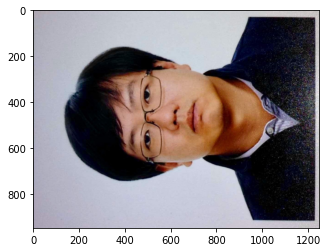

NameError: name 'w' is not defined

In [1]:
##################################################################################
# 
# Exp.03. 카메라 스티커앱 만들기 첫걸음
#
#####################################

# (1) 필요한 모듈 import
import os
import cv2                      # 이미지 처리를 위해 opencv import
import matplotlib.pyplot as plt # 노트북에 이미지를 출력하기 위한 matplotlib import
import numpy as np
import dlib

#####################################
# (2) 준비한 이미지를 읽습니다.
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/sihn_left.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()              # 출력용 이미지를 따로 보관합니다
# plt.imshow(img_bgr)
# plt.show()

#####################################
# (3) 색깔 보정 작업
# matplotlib, dlib 등의 이미지 라이브러리는 모두 이미지 채널을 RGB(빨강, 녹색, 파랑) 순으로 사용
# 그러나, opencv는 예외적으로 BGR(파랑, 녹색, 빨강)을 사용
# 그래서, opencv에서 다룬 이미지를 다른 이미지 라이브러리를 활용하여 출력하려면 
# 색깔 보정처리를 해주어야 함.
#
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
# b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
# img2 = cv2.merge([r,g,b])  # b, r을 바꿔서 Merge
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()


#####################################
# (4) detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()


#####################################
# (5) bounding box를 추출
# img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)


#####################################
# (6) 찾은 얼굴 영역 박스 리스트를 보여 준다.
# 여러 얼굴이 있을 수 있습니다 (그래서 리스트 입니다)
# print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    # 얼굴박스 그리기
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# plt.imshow(img_show_rgb)
plt.show()


#####################################
# (7) face landmark (object keypoint estimation)
#     위에서 찾은 얼굴박스에서 이목구비를 찾자.
#     top-down 방식으로 찾자.

# wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
# cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

# 다운로드 받은 landmark모델을 불러온다
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


# landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 
# dlib.full_object_detection 를 반환합니다.
# 이미지의 사람 얼굴에서 landmark에 해당 하는 부분의 위치를 point 로 가져온다.
list_landmarks = []
for dlib_rect in dlib_rects:                        # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
    points = landmark_predictor(img_rgb, dlib_rect) # face landmark 좌표를 구한다.저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) # face landmark 좌표를 저장해둡니다
    list_landmarks.append(list_points)

# print(len(list_landmarks[0]))

###########################################
# (8) 찾은 landmark의 위치에 점을 찍어보자
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2,    (0, 255, 200), 5)
#                  이미지,     중심,   반지름, ,              선두깨           
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

###########################################
# (9) 왕관 스티커 씌우기

# 왕관이 위치할 이미지의 위치 찾기 (x,y) : 왕관이미지의 시작 위치,  (w x h): 왕관이미지의 크기(가로x높이)
# 코의 위치를 기준으로 한다. (landmark 리스트에서 코의 위치는 index 30 입니다) 
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

# 스티커 이미지 불러오기
# sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)       # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h)) # 위에서 구한 왕관의 크기로 사이즈를 변경 한다.
# print (img_sticker.shape)

# 왕관의 위치는 사각형의 왼.쪽 위의의 위치가 코에 위치한다. 그러므로 
# 왕관의 위치를 왕관의 높이 만큼 위로 이동 하고, 욍관의 가로길이의 반 만큼 왼쪽으로 이동 해주도록 변경 한다. 
refined_x = x - w // 2
refined_y = y # + h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
print ('(w,h) : (%d,%d)'%(w, h))
# print()
# print(type(img_sticker))
# print(img_sticker.shape)
# print(img_sticker)



In [ ]:
refined_x = x - w // 2
refined_y = y # + h //2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

In [ ]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)


plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)


plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()